  ## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Data Collection and Processing

In [2]:
# Loading the dataset to pandas Dataframe
loan_dataset = pd.read_csv('data.csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
# Printing the first five rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# The Number of Rows and Columns
loan_dataset.shape

(614, 13)

In [6]:
# Statistical Measures for the dataset
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# no of missing Data in each Column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Dropping the missing values
loan_dataset = loan_dataset.dropna()

In [9]:
# no of missing Data in each Column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Label Encoding

In [10]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [11]:
print(loan_dataset['Loan_Status'])

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [12]:
# Printing the first five rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
# Dependent Column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [14]:
# Replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+',value = 4)

In [15]:
# Dependent Value
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

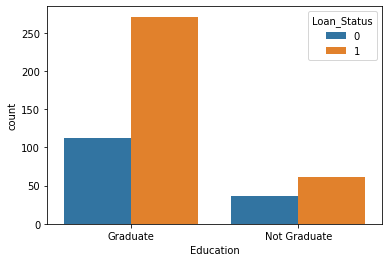

In [16]:
# Education and Load status
sns.countplot(x='Education',hue='Loan_Status',data = loan_dataset)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

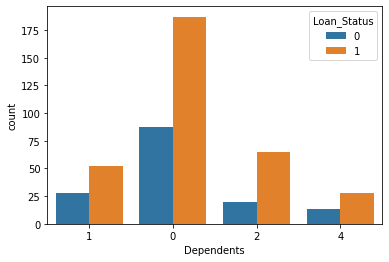

In [17]:
# Dependents and Load status
sns.countplot(x='Dependents',hue='Loan_Status',data = loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

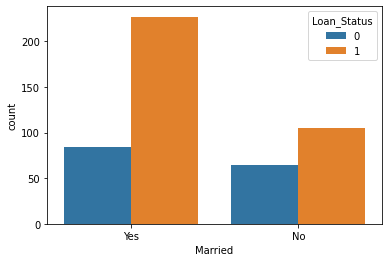

In [18]:
# Marital Status and Load status
sns.countplot(x='Married',hue='Loan_Status',data = loan_dataset)

<AxesSubplot:xlabel='Gender', ylabel='count'>

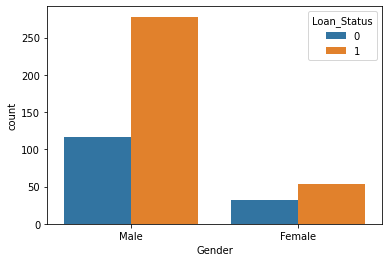

In [19]:
# Gender Status and Load status
sns.countplot(x='Gender',hue='Loan_Status',data = loan_dataset)

# Convert categorical Columns to numerical Values

In [20]:
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace = True)


In [21]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [22]:
# Separating the data and the label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']


In [23]:
print(X,Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

## Train and Test Split

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


## Training the Multiple Models To Find the Best Fit

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix


In [26]:
models ={
    'LogisticRegression':LogisticRegression(),
    'SVM':SVC(),
    'RandomForestClassifier':RandomForestClassifier(),
}

In [27]:
for i in range(len(models)):
    model = list(models.values())[i]
    model = model.fit(X_train,Y_train)
    
    pred = model.predict(X_test)
    
    # Test Set Performace
    Y_test_acc = accuracy_score(pred,Y_test)
    Y_test_precision = precision_score(pred,Y_test)
    Y_test_recall = recall_score(pred,Y_test)
    Y_test_Confusion_mat =confusion_matrix(pred,Y_test)
    
    print(list(models.keys())[i])
    print('*'*19)
    print(' ')
    print('Test Performance')
    print('Prediction_Value: ',pred)
    print('Accuracy of the Prediction: ',Y_test_acc)
    print('Precision of the Prediction: ',Y_test_precision)
    print('Recall of the Prediction:',Y_test_recall)
    print('Confusion Matrix: ',Y_test_Confusion_mat)
    

LogisticRegression
*******************
 
Test Performance
Prediction_Value:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 0]
Accuracy of the Prediction:  0.8333333333333334
Precision of the Prediction:  0.9393939393939394
Recall of the Prediction: 0.8378378378378378
Confusion Matrix:  [[ 9  2]
 [ 6 31]]
SVM
*******************
 
Test Performance
Prediction_Value:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]
Accuracy of the Prediction:  0.6875
Precision of the Prediction:  1.0
Recall of the Prediction: 0.6875
Confusion Matrix:  [[ 0  0]
 [15 33]]
RandomForestClassifier
*******************
 
Test Performance
Prediction_Value:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 0]
Accuracy of the Prediction:  0.8125
Precision of the Prediction:  0.9090909090909091
Recall of the Prediction: 0.8333333333333334
Confusion Matrix:  [[ 9  3]
 [ 6

## So From the Above Observation Logistic Regression Is Performing Better For the Particular DataSet

In [32]:
lg = LogisticRegression()
lg = lg.fit(X_train,Y_train)
input_data =  (1,1,4,1,0,2222,5112.0,8.0,360.0,0.1,1)
input_asarray = np.asarray(input_data)
X_reshape = input_asarray.reshape(1,-1)
prediction = lg.predict(X_reshape)
print(prediction)
if(prediction==1):
    print('The Person is eligible for loan')
else:
    print('The Person is not eligible for loan')

[0]
The Person is not eligible for loan


In [33]:
Y[1]

0